
# 6. Chapter :  Image Thresholding

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

Function Syntax
retval, dst = cv.threshold( src, thresh, maxval, type[, dst] )
dst: The output array of the same size and type and the same number of channels as src.

The function has 4 required arguments:

src: input array (multiple-channel, 8-bit or 32-bit floating point).

thresh: threshold value.

maxval: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

type: thresholding type (see ThresholdTypes).

Function Syntax

(572, 800)


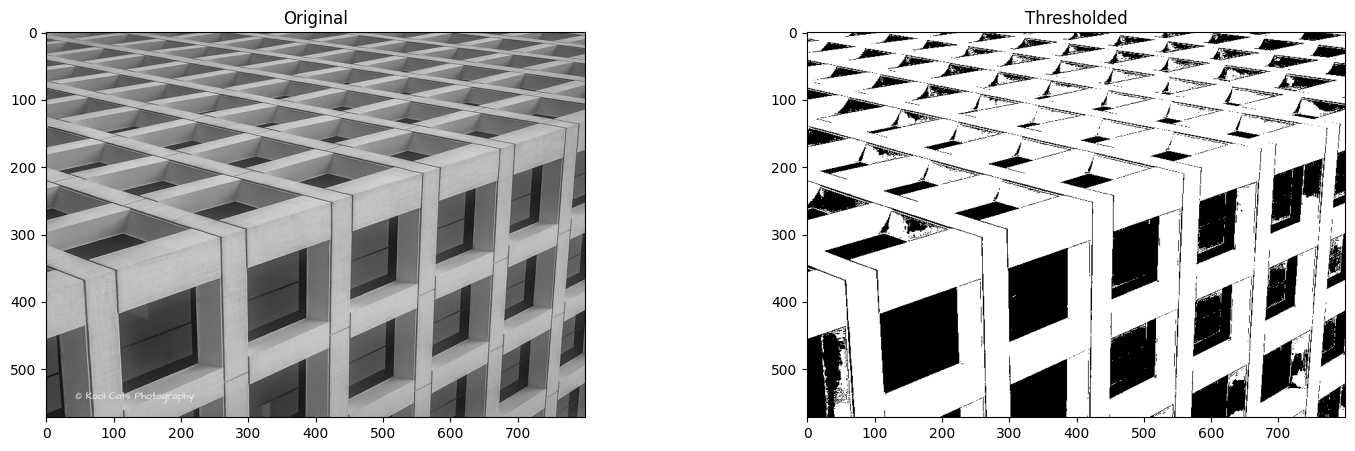

In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img_read = cv.imread("Images/building-windows.jpg", cv.IMREAD_GRAYSCALE)
retval, img_thresh = cv.threshold(img_read, 100, 255, cv.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

## Application: Sheet Music Reader
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to
Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding
techniques. Let's take a look at an example.

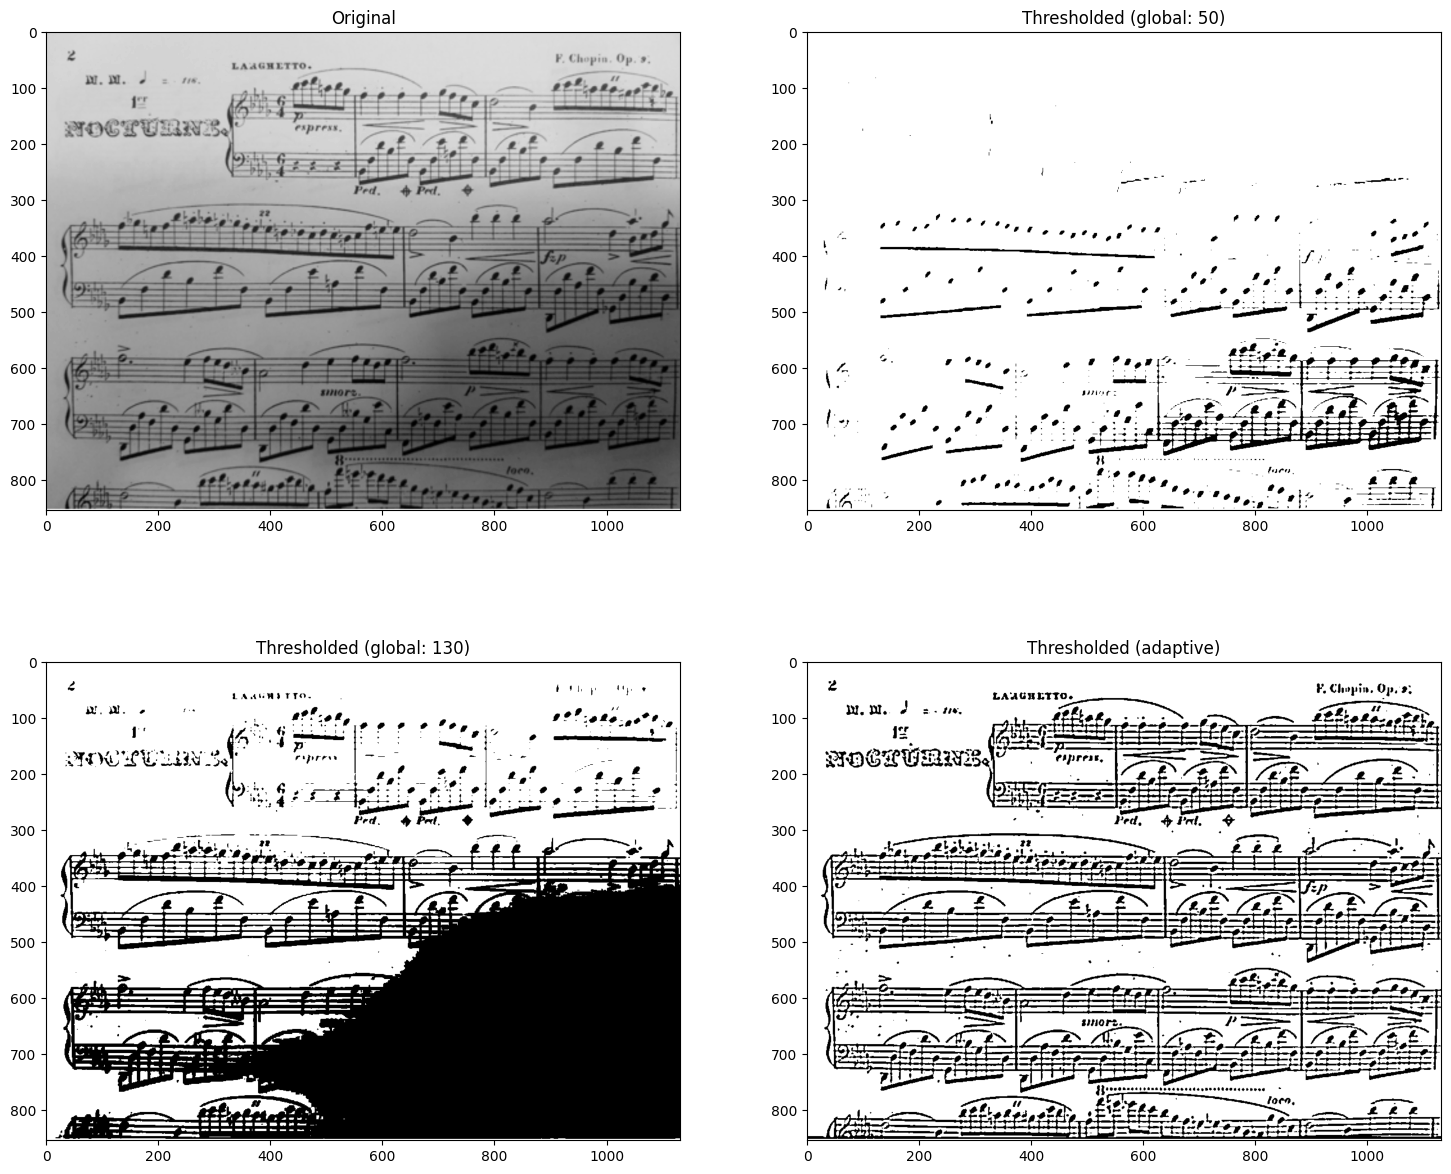

In [23]:
# Read the original image
img_read = cv.imread("Images/Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv.threshold(img_read, 130, 255, cv.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

# Introduction to Morphology

Morphology is a comprehensive set of image processing operations that process images based on shapes [1]. Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.

There is a slight overlap between Morphology and Image Segmentation. Morphology consists of methods that can be used to pre-process the input data of Image Segmentation or to post-process the output of the Image Segmentation stage. In other words, once the segmentation is complete, morphological operations can be used to remove imperfections in the segmented image and deliver information on the shape and structure of the image as shown in Figure 2.


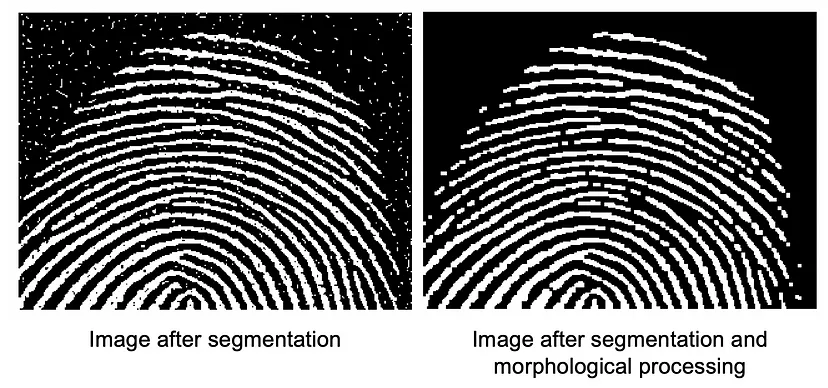


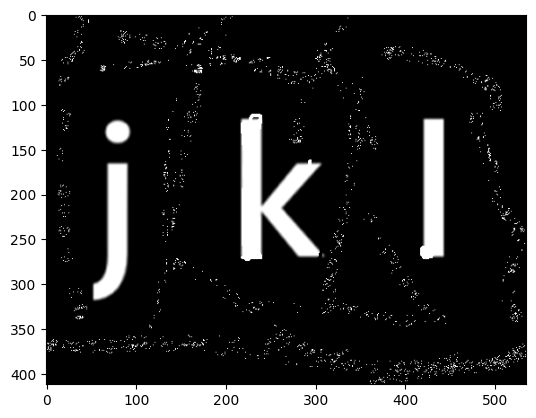

In [24]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Images/three.jpeg', cv.IMREAD_GRAYSCALE)
img = 255-cv.imread('Images/jkl.png', cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")


## 1. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let's see it how it works:

True

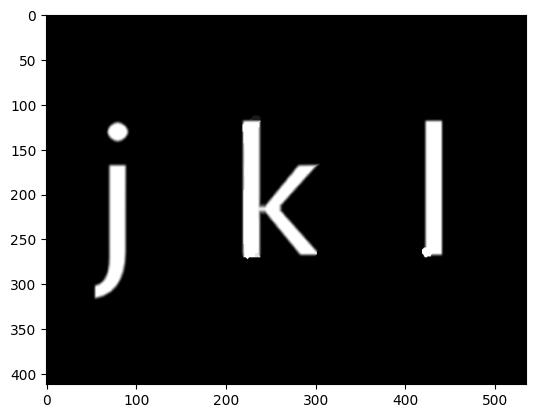

In [25]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap="gray")
cv.imwrite("Images/jkl_clear.jpg", erosion)

## 2. Dilation
It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

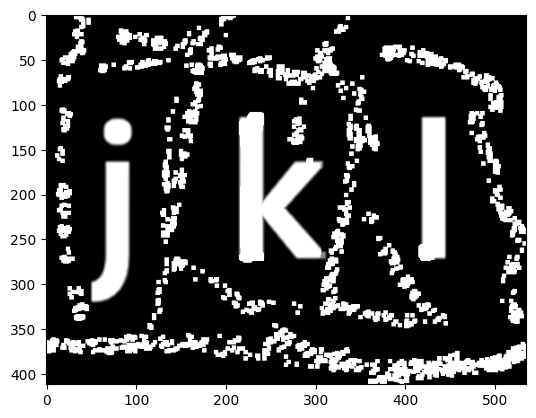

In [26]:
dilation = cv.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")

### 3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()



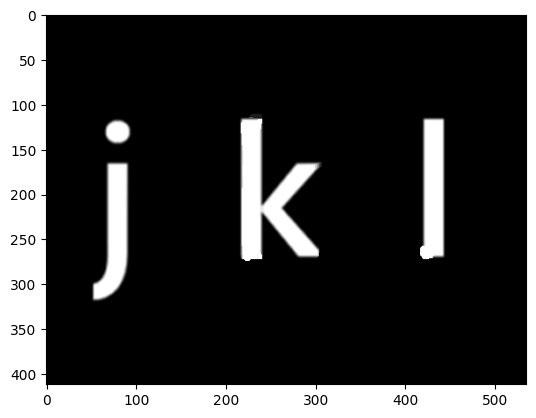

In [27]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.imshow(opening,cmap="gray")

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

### 4. Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

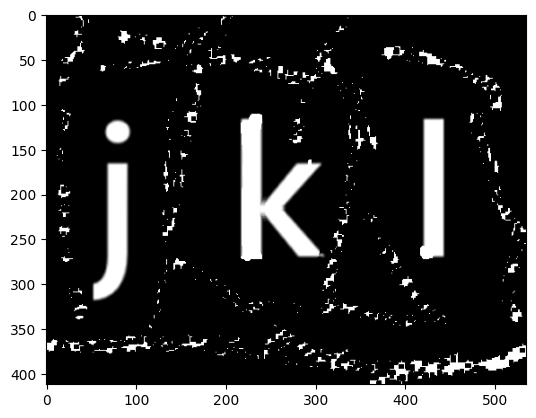

In [28]:
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="gray")


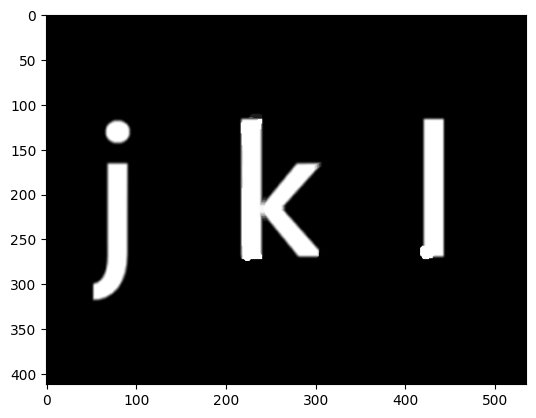

In [29]:
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="gray")


### 5. Morphological Gradient

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

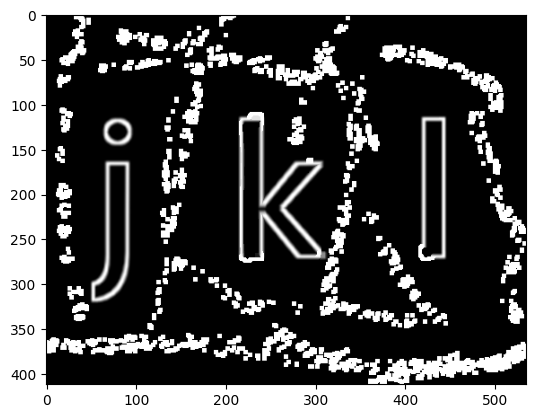

In [30]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap="gray")


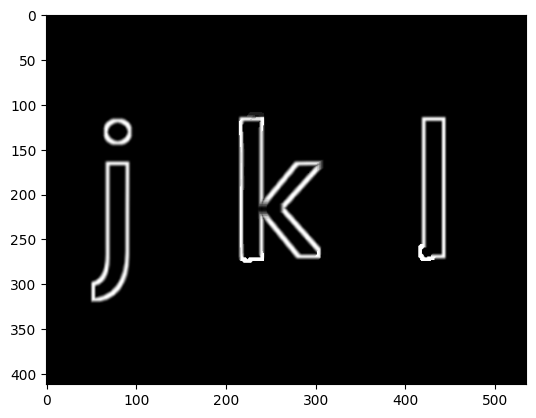

In [31]:
gradient = cv.morphologyEx(closing, cv.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap="gray")


 ### 6. Top Hat

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

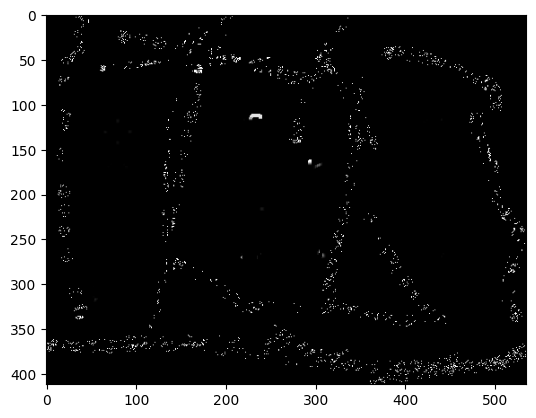

In [32]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.imshow(tophat,cmap="gray")


### 7. Black Hat

It is the difference between the closing of the input image and input image.
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

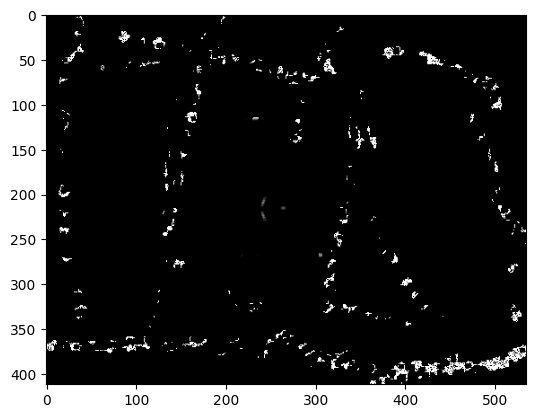

In [33]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat,cmap="gray")


### Structuring Element

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [34]:
cv.getStructuringElement(cv.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [35]:
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [36]:
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

https://homepages.inf.ed.ac.uk/rbf/HIPR2/hitmiss.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/skeleton.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm

https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756


https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756

https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-image-enhancement/



https://www.upgrad.com/blog/image-segmentation-techniques/

## Region grwing segmentation

https://sbme-tutorials.github.io/2019/cv/notes/6_week6.html

## Image Segmentation with Watershed Algorithm

Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys. You start filling every isolated valleys (local minima) with different colored water (labels). As the water rises, depending on the peaks (gradients) nearby, water from different valleys, obviously with different colors will start to merge. To avoid that, you build barriers in the locations where water merges. You continue the work of filling water and building barriers until all the peaks are under water. Then the barriers you created gives you the segmentation result. This is the "philosophy" behind the watershed. You can visit the CMM webpage on watershed to understand it with the help of some animations.

This implementation uses a simple iterative algorithm to grow the region from the seed points. The algorithm starts by adding the seed points to a queue. Then, it repeatedly pops the next pixel from the queue and adds it to the mask. The algorithm also checks the neighbors of the pixel and adds them to the queue if they are inside the image and not already in the mask. The algorithm stops when the queue is empty.
Here is an example of how to use the region growing algorithm to segment a medical image:

But this approach gives you oversegmented result due to noise or any other irregularities in the image. So OpenCV implemented a marker-based watershed algorithm where you specify which are all valley points are to be merged and which are not. It is an interactive image segmentation. What we do is to give different labels for our object we know. Label the region which we are sure of being the foreground or object with one color (or intensity), label the region which we are sure of being background or non-object with another color and finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm. Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

Code
Below we will see an example on how to use the Distance Transform along with watershed to segment mutually touching objects.

Consider the coins image below, the coins are touching each other. Even if you threshold it, it will be touching each other.

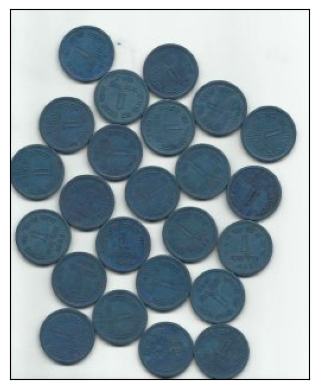

In [37]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Images/water_coins.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.xticks([]), plt.yticks([])
plt.imshow(img)


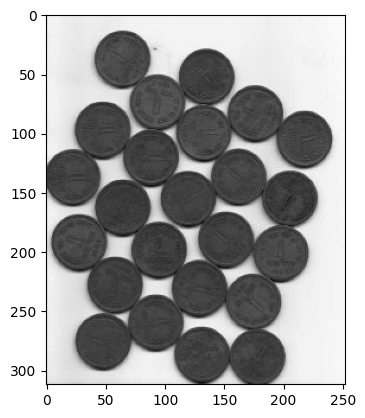

In [38]:
plt.imshow(gray, cmap="gray")

162.0


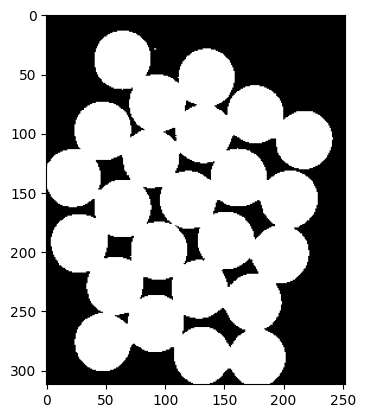

In [39]:
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")
#print(thresh)
print(ret)

C:\Users\ganga\AppData\Local\Temp\ipykernel_11960\1356715254.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231),plt.imshow(thresh,cmap="gray"), plt.title("binary Image")


(([], []), ([], []))

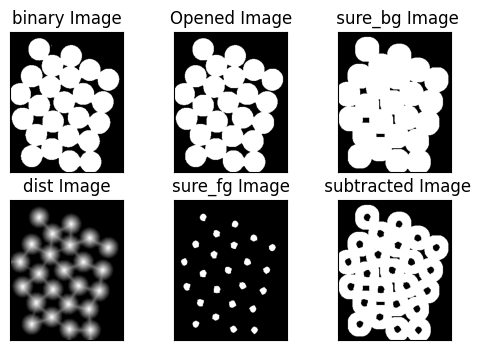

In [40]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 3)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.figure(figsize=(6,4))
plt.xticks([]), plt.yticks([])

plt.subplot(231),plt.imshow(thresh,cmap="gray"), plt.title("binary Image")
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(opening,cmap="gray"), plt.title("Opened Image")
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(sure_bg,cmap="gray"), plt.title(" sure_bg Image")
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(dist_transform,cmap="gray"), plt.title("dist Image")
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(sure_fg, cmap="gray"), plt.title("sure_fg Image")
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(unknown,cmap="gray"), plt.title(" subtracted Image")
plt.xticks([]), plt.yticks([])


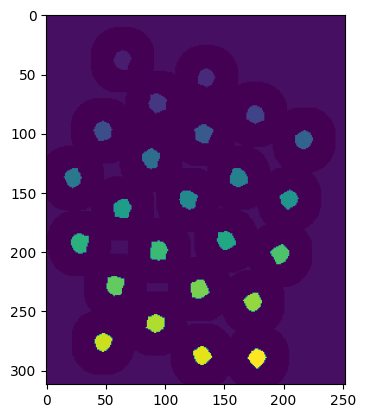

In [41]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)#, cmap="gray")

(<Axes: >, <matplotlib.image.AxesImage at 0x1d1dfaabc10>)

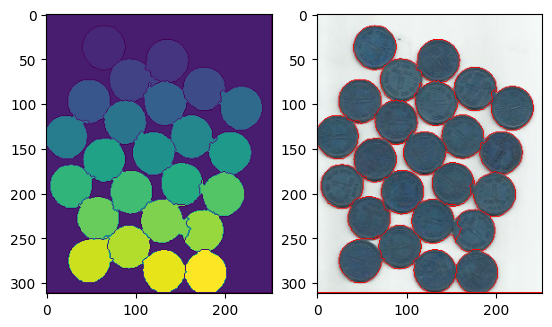

In [42]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(121), plt.imshow(markers),
plt.subplot(122), plt.imshow(img, cmap="gray")

# Thank you